In [1]:
import xlwings as xw
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
import numpy as np
import statistics

In [2]:
wb1 = xw.Book(r'D:\Published\exposomeProjUvA\plot\tuneRF_ms1pestExclu.xlsx')
wb2 = xw.Book(r'D:\Published\exposomeProjUvA\plot\tuneRF_DEms1pestExclu.xlsx')

In [3]:
sheet1 = wb1.sheets("hyperparameterTuning_TPTNwithAb").used_range.value
df_tuneRF_pestExclu = pd.DataFrame(sheet1)
sheet2 = wb2.sheets("hyperparameterTuning_TPTNwithAb").used_range.value
df_tuneRF_DEpestExclu = pd.DataFrame(sheet2)

In [4]:
df_tuneRF_pestExclu = df_tuneRF_pestExclu[df_tuneRF_pestExclu.columns[:15]]
df_tuneRF_DEpestExclu = df_tuneRF_DEpestExclu[df_tuneRF_DEpestExclu.columns[:15]]

In [5]:
df_tuneRF_pestExclu = df_tuneRF_pestExclu.rename(columns=df_tuneRF_pestExclu.iloc[0]).drop(df_tuneRF_pestExclu.head(1).index)
df_tuneRF_DEpestExclu = df_tuneRF_DEpestExclu.rename(columns=df_tuneRF_DEpestExclu.iloc[0]).drop(df_tuneRF_DEpestExclu.head(1).index)

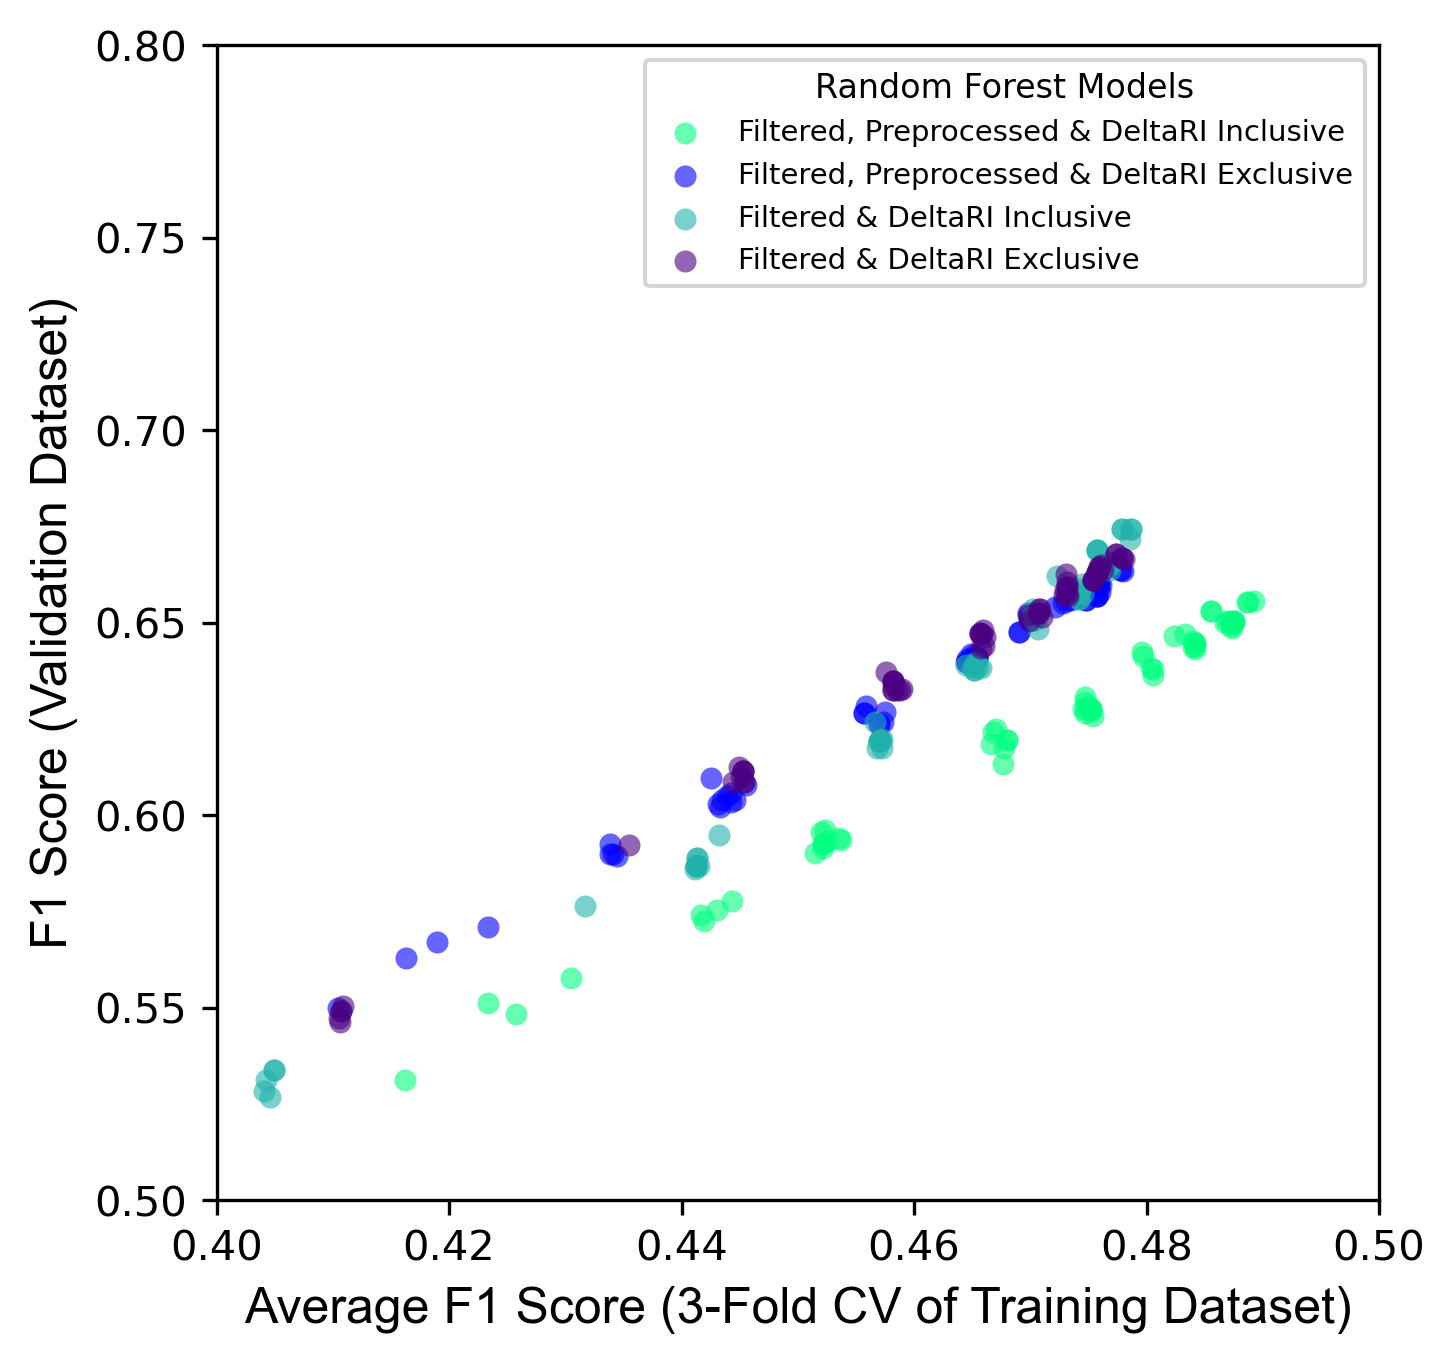

In [7]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams["figure.dpi"] = 300

x1 = df_tuneRF_pestExclu['f1_3Ftrain']
y1 = df_tuneRF_pestExclu['f1_pest']
x2 = df_tuneRF_DEpestExclu['f1_3Ftrain']
y2 = df_tuneRF_DEpestExclu['f1_pest']

(fig, ax) = plt.subplots()

c_dict2 = {"Filtered, Preprocessed & DeltaRI Inclusive": 'springgreen', "Filtered, Preprocessed & DeltaRI Exclusive": 'blue'}
count_start = 0
count_end = 64
for mod in c_dict2:
    ax.scatter(x2[count_start:count_end], y2[count_start:count_end], s=28, label=mod, c=c_dict2[mod], alpha=0.6, lw=0)
    count_start = count_end
    count_end += 64


c_dict1 = {"Filtered & DeltaRI Inclusive": 'lightseagreen', "Filtered & DeltaRI Exclusive": 'indigo'}
count_start = 0
count_end = 64
for mod in c_dict1:
    ax.scatter(x1[count_start:count_end], y1[count_start:count_end], s=28, label=mod, c=c_dict1[mod], alpha=0.6, lw=0)
    count_start = count_end
    count_end += 64

    
plt.xlabel("Average F1 Score (3-Fold CV of Training Dataset)", fontproperties='Arial', fontsize=12)
plt.ylabel("F1 Score (Validation Dataset)", fontproperties='Arial', fontsize=12)

plt.xlim(0.4,0.5)
plt.ylim(0.5,0.8)

ax.legend(loc="upper right", title="Random Forest Models", title_fontsize=8, fontsize=7)

#plt.show()
plt.savefig(r"D:\Published\exposomeProjUvA\plot\tuneRF_avg3FCV_pestExclu_filtered.jpg", bbox_inches='tight')
#plt.close()